In [2]:
import os

os.chdir("..")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
dataset = "esw"  # "swed"
bands = "rgb"

In [8]:
df_hydro = pd.read_csv(f"results/{dataset}_hydro_{bands}_1.csv", index_col=0)
df_swinv2_imagenet = pd.read_csv(f"results/{dataset}_unet_swinv2_imagenet_{bands}_1.csv", index_col=0)
df_resnet50_imagenet = pd.read_csv(f"results/{dataset}_unet_resnet50_{bands}_1.csv", index_col=0)
df_swinv2_satlas = pd.read_csv(f"results/{dataset}_unet_swinv2_satlas_{bands}_1.csv", index_col=0)

In [12]:
df_hydro.head(1)

,test_loss,test_multiclassaccuracy_0,test_multiclassaccuracy_1,test_AverageAccuracy,test_AverageF1Score,test_AverageIoU,test_AveragePrecision,test_AverageRecall,test_multiclassfbetascore_0,test_multiclassfbetascore_1,...,test_OverallF1Score,test_OverallIoU,test_OverallPrecision,test_OverallRecall,test_multiclassprecision_0,test_multiclassprecision_1,test_multiclassrecall_0,test_multiclassrecall_1,train_fraction,seed
0,0.491809,0.953678,0.089441,0.521559,0.500256,0.416009,0.565571,0.521559,0.859939,0.140573,...,0.760963,0.617047,0.760963,0.760963,0.785267,0.345875,0.953678,0.089441,0.0008,0


In [19]:
metric = "test_OverallIoU"

# Calculate means and standard deviations for df_hydro
pivot_hydro = df_hydro.pivot_table(
    values=metric, index="train_fraction", aggfunc=[np.mean, np.std]
)
results_hydro_xs = pivot_hydro.index.values.squeeze()
results_hydro_means = pivot_hydro["mean"].values.squeeze()
results_hydro_stds = pivot_hydro["std"].values.squeeze()

# Calculate means and standard deviations for df_swinv2_imagenet
pivot_swinv2_imagenet = df_swinv2_imagenet.pivot_table(
    values=metric, index="train_fraction", aggfunc=[np.mean, np.std]
)
results_swinv2_imagenet_xs = pivot_swinv2_imagenet.index.values.squeeze()
results_swinv2_imagenet_means = pivot_swinv2_imagenet['mean'].values.squeeze()
results_swinv2_imagenet_stds = pivot_swinv2_imagenet['std'].values.squeeze()

# Calculate means and standard deviations for df_resnet50_imagenet
pivot_resnet50_imagenet = df_resnet50_imagenet.pivot_table(values=metric, index='train_fraction', aggfunc=[np.mean, np.std])
results_resnet50_imagenet_xs = pivot_resnet50_imagenet.index.values.squeeze()
results_resnet50_imagenet_means = pivot_resnet50_imagenet['mean'].values.squeeze()
results_resnet50_imagenet_stds = pivot_resnet50_imagenet['std'].values.squeeze()

# Calculate means and standard deviations for df_swinv2_satlas
pivot_swinv2_satlas = df_swinv2_satlas.pivot_table(values=metric, index='train_fraction', aggfunc=[np.mean, np.std])
results_swinv2_satlas_xs = pivot_swinv2_satlas.index.values.squeeze()
results_swinv2_satlas_means = pivot_swinv2_satlas['mean'].values.squeeze()
results_swinv2_satlas_stds = pivot_swinv2_satlas['std'].values.squeeze()


/tmp/ipykernel_2464211/3480407665.py:4: FutureWarning: The provided callable <function mean at 0x7f0c7815d120> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_hydro = df_hydro.pivot_table(
/tmp/ipykernel_2464211/3480407665.py:4: FutureWarning: The provided callable <function std at 0x7f0c7815d260> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  pivot_hydro = df_hydro.pivot_table(
/tmp/ipykernel_2464211/3480407665.py:12: FutureWarning: The provided callable <function mean at 0x7f0c7815d120> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_swinv2_imagenet = df_swinv2_imagenet.pivot_table(
/tmp/ipyke

In [20]:
results_hydro_xs

array([0.0008, 0.0016, 0.0032, 0.0064, 0.0128, 0.0256, 0.0512, 0.1012])

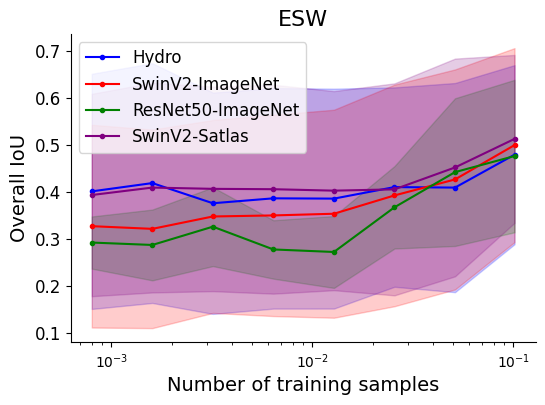

In [21]:
plt.figure(figsize=(6, 4))
ax = plt.gca()

plt.plot(results_hydro_xs, results_hydro_means, marker=".", label="Hydro", color="blue")
plt.fill_between(
    results_hydro_xs,
    results_hydro_means - results_hydro_stds,
    results_hydro_means + results_hydro_stds,
    color="blue",
    alpha=0.2,
)

plt.plot(
    results_swinv2_imagenet_xs,
    results_swinv2_imagenet_means,
    marker=".",
    label="SwinV2-ImageNet",
    color="red",
)
plt.fill_between(
    results_swinv2_imagenet_xs,
    results_swinv2_imagenet_means - results_swinv2_imagenet_stds,
    results_swinv2_imagenet_means + results_swinv2_imagenet_stds,
    color="red",
    alpha=0.2,
)

plt.plot(results_resnet50_imagenet_xs, results_resnet50_imagenet_means, marker=".", label="ResNet50-ImageNet", color='green')
plt.fill_between(results_resnet50_imagenet_xs, results_resnet50_imagenet_means - results_resnet50_imagenet_stds, results_resnet50_imagenet_means + results_resnet50_imagenet_stds, color='green', alpha=0.2)

plt.plot(results_swinv2_satlas_xs, results_swinv2_satlas_means, marker=".", label="SwinV2-Satlas", color='purple')
plt.fill_between(results_swinv2_satlas_xs, results_swinv2_satlas_means - results_swinv2_satlas_stds, results_swinv2_satlas_means + results_swinv2_satlas_stds, color='purple', alpha=0.2)

plt.xlabel("Number of training samples", fontsize=14)
plt.ylabel("Overall IoU", fontsize=14)
#plt.xticks(results_hydro_xs, [1,2,5,13,26], fontsize=12)
plt.yticks(fontsize=12)
plt.xscale("log")

plt.title("ESW", fontsize=16)
plt.legend(loc="upper left", fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.close()